In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import ast
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [4]:
artists = pd.read_csv('data_by_artist.csv')
artists.head()

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
0,Frank Sinatra,792507,0.384478,0.238017,0.364288,110.181698,-14.271141,1,5,0.735648,0.020855,0.232106,0.049614,189179.9255,26.004383,1369
1,Vladimir Horowitz,119107,0.343210,0.118844,0.225951,94.900679,-23.193418,1,1,0.990070,0.879508,0.183812,0.043360,266541.1251,3.592378,1207
2,Johnny Cash,816890,0.619803,0.449381,0.680662,115.037747,-11.593104,1,10,0.685637,0.022647,0.242243,0.098216,162279.2672,26.614130,1104
3,Billie Holiday,79016,0.572637,0.201368,0.498934,109.912172,-13.225966,1,5,0.908499,0.013064,0.217727,0.062432,185131.4530,15.621005,1095
4,Bob Dylan,66915,0.512598,0.477932,0.551934,126.160149,-11.184330,1,7,0.562567,0.034211,0.308978,0.064535,256713.4203,30.860806,1092


In [5]:
years = pd.read_csv('data_by_year.csv')
years.head()

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,1921,0.425661,0.236784,0.425495,100.397758,-17.095437,1,7,0.895823,0.322330,0.215814,0.077258,229911.9141,0.351562
1,1922,0.480000,0.237026,0.534056,101.376139,-19.179958,1,10,0.939236,0.440470,0.238647,0.115419,167904.5417,0.138889
2,1923,0.568462,0.246936,0.624788,112.456598,-14.373882,1,0,0.976329,0.401932,0.236656,0.098619,178356.3018,5.727811
3,1924,0.548654,0.347033,0.668574,120.653359,-14.202304,1,10,0.935575,0.583955,0.237875,0.090210,188461.6498,0.603376
4,1925,0.571890,0.264373,0.616430,115.671715,-14.516707,1,5,0.965422,0.408893,0.243094,0.115457,184130.6996,2.707224


In [6]:
#remove songs by artists that arent in the artists table
#duplicate songs w/ more than one artist
#takes my computer about a minute to run
#can ignore the warnings about setting a copy of a slice from a dataframe
full = pd.read_csv('full_music_data.csv')
allArtists = list(artists['artist_id'])
newdict = {}

full['artists_id'] = [int(x.split(',')[0][1:-1]) if len(x.split(',')) == 1 else [int(y) for y in x[1:-1].split(',')] for x in list(full['artists_id'])]
full['artist_names'] = [ast.literal_eval(x) if len(ast.literal_eval(x)) > 1 else ast.literal_eval(x)[0] for x in full['artist_names']]
floor = min(full['tempo'])
span = max(full['tempo']) - floor
full['tempo'] = [(x-floor)/span for x in full['tempo']]

last_id = 0
row = 0
for i in range(len(full)): 
    thisRow = full.iloc[i,:]
    artIDs = thisRow['artists_id']
    artNames = thisRow['artist_names']
    
    if type(artIDs) == int:
        if artIDs == last_id: 
            thisRow['artists_id'] = artIDs
            thisRow['artist_names'] = artNames
            newdict[row] = thisRow.to_dict()
            row+=1
            last_id = artIDs
        else:
            if artIDs in allArtists:
                thisRow['artists_id'] = artIDs
                thisRow['artist_names'] = artNames
                newdict[row] = thisRow.to_dict()
                row+=1
                last_id = artIDs
                
    else:
        for j in range(len(artIDs)):
            artID = int(artIDs[j])
            artName = str(artNames[j])
            
            if artID in allArtists:
                thisRow['artists_id'] = artID
                thisRow['artist_names'] = artName
                newdict[row] = thisRow.to_dict()
                row+=1
    i+=1

full = pd.DataFrame.from_dict(newdict,'index')
full

/Users/katherinefaiola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/katherinefaiola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/katherinefaiola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/katherinefaiola/opt/anaconda3/

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,Fat Freddy's Drop,178301,0.600,0.365,0.131,0.532777,-13.083,0,9,0.06720,0.585000,0.0921,0.0498,0,437200,54,2005,2005,Ernie
1,Fat Freddy's Drop,178301,0.874,0.326,0.179,0.490063,-13.302,0,11,0.01360,0.148000,0.0993,0.1310,0,581008,53,2005,2005,Wandering Eye
2,Fat Freddy's Drop,178301,0.670,0.531,0.336,0.571037,-8.267,0,9,0.01560,0.345000,0.3060,0.0377,0,431293,55,2009,8/7/2009,The Raft
3,Alexander O'Neal,625201,0.761,0.702,0.850,0.429237,-8.523,1,7,0.10800,0.000031,0.0935,0.0389,0,304427,34,1991,1/1/1991,All True Man
4,Alexander O'Neal,625201,0.661,0.828,0.902,0.471455,-12.673,0,11,0.27600,0.000001,0.2870,0.0390,0,264933,37,1987,7/29/1987,(What Can I Say) To Make You Love Me
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103482,ZZ Top,690254,0.276,0.892,0.715,0.329693,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975,4/18/1975,Jailhouse Rock - **** Remaster
103483,ZZ Top,690254,0.700,0.592,0.906,0.450025,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976,11/29/1976,It's Only Love
103484,ZZ Top,690254,0.709,0.709,0.863,0.456977,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987,1987,Balinese
103485,ZZ Top,690254,0.552,0.651,0.533,0.661835,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992,4/13/1992,La Grange - **** Remaster


In [7]:
influence = pd.read_csv('influence_data.csv')
influence.head()

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990


In [72]:
names = []
for i in artists['artist_name']:
    names.append(i)
influence = influence[influence['influencer_name'].isin(names)]
influence = influence[influence['follower_name'].isin(names)]
influence = influence.reset_index(drop=True)
influence

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42747,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42748,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42749,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42750,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [9]:
influenceGraph = nx.DiGraph()

In [10]:
i = 0
while i < len(influence):
    influencer = artists[artists['artist_name'] == influence['influencer_name'][i]]
    influencer = influencer[['energy','valence', 'key', 'acousticness', 'instrumentalness', 'speechiness']]
    v1 = influencer.to_numpy()
    follower = artists[artists['artist_name'] == influence['follower_name'][i]]
    follower = follower[['energy','valence', 'key', 'acousticness', 'instrumentalness', 'speechiness']]
    v2 = follower.to_numpy()
    weight = cosine_similarity(v1, v2) * 1000
    influenceGraph.add_edge(influence['influencer_name'][i], influence['follower_name'][i], weight = weight)
    i += 1

In [11]:
idDict = {}
for i in range(len(artists)):
    idDict[artists['artist_id'][i]] = artists['artist_name'][i]

influence = pd.read_csv('influence_data.csv')
iGraph = nx.DiGraph()
for artist in artists['artist_id']:
    iGraph.add_node(artist, weight = 0)
    
for i in range(len(influence)):
    influencer = influence["influencer_id"][i]
    follower = influence['follower_id'][i]
    
    iGraph.add_edge(influencer,follower)    

arts = []
artnames = []
scores = []
for node in iGraph.nodes():
    children = list(iGraph.successors(node))
    total = 0
    for child in children:
        total += iGraph.out_degree[child]
        
    iGraph.nodes[node]['weight'] = total
    arts.append(node)
    try:
        artnames.append(idDict[node])
    except KeyError:
        artnames.append('Unknown')
    scores.append(total)
    
   
totalInfluence = pd.DataFrame({'names':artnames, 'artists':arts, 'scores':scores})
totalInfluence = totalInfluence.sort_values(by=['scores'], ascending = False)
totalInfluence[:20]

,names,artists,scores
15,The Beatles,754032,11237
4,Bob Dylan,66915,7928
5,The Rolling Stones,894465,6341
137,Chuck Berry,120521,5897
7,Elvis Presley,180228,4749
210,The Velvet Underground,840402,4380
176,Little Richard,824022,4371
147,Jimi Hendrix,354105,4312
201,Hank Williams,549797,4134
35,The Kinks,100160,4067


In [13]:
totalInfluence = totalInfluence.reset_index(drop=True)
totalInfluence.head()

,names,artists,scores
0,The Beatles,754032,11237
1,Bob Dylan,66915,7928
2,The Rolling Stones,894465,6341
3,Chuck Berry,120521,5897
4,Elvis Presley,180228,4749


In [15]:
artistStyle = full.groupby(['artist_names']).mean() #some values dont make sense to average but w/ex
artistStyle

songStats = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness']

for edge in list(iGraph.edges())[:100]: #could combine this w/weighted influence scores to see how much they actually influence
    inf = edge[0] #the musical style of the people theys upposedly influence 
    fol = edge[1]
    infstats = artistStyle[artistStyle['artists_id'] == inf][songStats]
    folstats = artistStyle[artistStyle['artists_id'] == fol][songStats]
    a = cosine_similarity(infstats, folstats)

In [149]:
genre = []
for i in influence['influencer_main_genre']:
    if i not in genre:
        genre.append(i)
for i in influence['follower_main_genre']:
    if i not in genre:
        genre.append(i)
genre

['Pop/Rock',
 'Electronic',
 'Reggae',
 'Jazz',
 'Country',
 'Comedy/Spoken',
 'R&B;',
 'Classical',
 'Latin',
 'Vocal',
 'Folk',
 'Easy Listening',
 'International',
 'Avant-Garde',
 'Blues',
 'Stage & Screen',
 'New Age',
 'Religious',
 "Children's",
 'Unknown']

In [17]:
artistByGenre = {}
for i in genre:
    artistByGenre[i] = []
i = 0
while i < len(influence):
    genreList = artistByGenre.get(influence['influencer_main_genre'][i])
    genreListF = artistByGenre.get(influence['follower_main_genre'][i])
    if influence['influencer_name'][i] not in genreList:
        genreList.append(influence['influencer_name'][i])
    if influence['follower_name'][i] not in genreListF:
        genreListF.append(influence['follower_name'][i])
    i += 1

In [18]:
jazzSongs = full[full['artist_names'].isin(artistByGenre.get('Jazz'))]
jazzSongs = jazzSongs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
jazzMeans = jazzSongs.mean(axis=0)
jazzMeans = jazzMeans.to_numpy()

In [19]:
genreFeatures = []
for i in genre:
    songs = full[full['artist_names'].isin(artistByGenre.get(i))]
    songs = songs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
    means = songs.mean(axis=0)
    means = means.to_numpy()
    genreFeatures.append(means)

In [20]:
i = 0
jazzsim = []
while i < len(genre):
    sim = cosine_similarity(jazzMeans.reshape(1, -1), genreFeatures[i].reshape(1, -1))
    jazzsim.append(sim[0][0])
    i += 1

In [147]:
d = {'Genre' : genre, 'Cosine Similarity' : jazzsim}
jazzSimilarity = pd.DataFrame(data=d)
jazzSimilarity = jazzSimilarity.sort_values(by=['Cosine Similarity'], ascending = False)
jazzSimilarity = jazzSimilarity.reset_index(drop=True)
jazzSimilarity.head()

,Genre,Cosine Similarity
0,Jazz,1.000000
1,Avant-Garde,0.999892
2,Easy Listening,0.999821
3,Folk,0.999606
4,Stage & Screen,0.998424


In [146]:
for i in genre:
    songs = full[full['artist_names'].isin(artistByGenre.get(i))]
    songs = songs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
    means = songs.mean(axis=0)

In [144]:
RBSongs = full[full['artist_names'].isin(artistByGenre.get('R&B;'))]
RBSongs = RBSongs.sort_values(by='year')
RBSongs = RBSongs.reset_index(drop=True)
RBSongs.head()

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,Aretha Franklin,927555,0.496,0.829,0.733,0.487597,-8.876,0,5,0.629,0.076800,0.162,0.0519,0,161893,0,1927,1927,Evil **** ***** - Live
1,Screamin' Jay Hawkins,309458,0.845,0.455,0.896,0.356433,-13.668,0,5,0.710,0.420000,0.055,0.0488,0,145933,2,1927,1927,I Put A Spell On You - Live
2,Chuck Willis,126144,0.556,0.476,0.730,0.700698,-6.766,1,10,0.959,0.002400,0.242,0.0778,0,132733,0,1932,1932,Take It Like A Man (with The Royals)
3,Aretha Franklin,927555,0.648,0.356,0.529,0.355339,-13.917,0,7,0.896,0.000036,0.110,0.0837,0,186160,3,1936,1936,It Ain't Necessarily So - from ***** and Bess
4,Babyface,61226,0.400,0.408,0.143,0.567764,-8.039,0,0,0.771,0.013000,0.114,0.0286,0,287853,2,1941,1941,Strange Fruit


In [82]:
adherence.head()

,influencer_name,influencer_main_genre,follower_name,follower_main_genre
39,BÃ©la Fleck,Jazz,Tony Furtado,Pop/Rock
96,Spyro Gyra,Jazz,Allan Holdsworth,Pop/Rock
115,Miles Davis,Jazz,Tangerine Dream,Electronic
180,Cab Calloway,Jazz,T-Bone Walker,Blues
181,Charlie Christian,Jazz,T-Bone Walker,Blues


In [159]:
# jazz genre adherence
adherence = influence[['influencer_name','influencer_main_genre', 'follower_name','follower_main_genre']]
adherence = adherence[adherence['influencer_main_genre'] == "Jazz"]

totalFollowersGenres = adherence['follower_main_genre'].value_counts().sum()

totalJazzFollowers = adherence[adherence['follower_main_genre'] == 'Jazz']['follower_main_genre'].value_counts().sum()


percentGenreAdherence = totalJazzFollowers/totalFollowersGenres *100
percentGenreAdherence

65.13254786450663

In [134]:
adherence[(adherence['follower_main_genre'] == 'Jazz')][(adherence['influencer_name']== 'Alice Coltrane')]

/Users/katherinefaiola/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,influencer_name,influencer_main_genre,follower_name,follower_main_genre
41213,Alice Coltrane,Jazz,Matthew Halsall,Jazz


In [143]:
# jazz influencer adherence
uniqueInfNames = list(set(adherence['influencer_name']))
infGenreAdherence = []

for i in uniqueInfNames:
    influencerSubset = adherence[adherence['influencer_name'] == i]
    totalInfluencerFollowers = influencerSubset['follower_main_genre'].value_counts().sum()

    totalInfluencerJazzFollowers = influencerSubset[influencerSubset['follower_main_genre'] == 'Jazz']['follower_main_genre'].value_counts().sum()

    
    percentInfGenreAdherence = totalInfluencerJazzFollowers / totalInfluencerFollowers * 100
    infGenreAdherence.append(percentInfGenreAdherence)

In [137]:
len(uniqueInfNames)

295

In [138]:
len(infGenreAdherence)

295

In [151]:
jazzInfluencerAdherence = pd.DataFrame(data= {'influencer_name': uniqueInfNames, 'genre_adherence': infGenreAdherence })
jazzInfluencerAdherence.head()

,influencer_name,genre_adherence
0,Bola Sete,0.000000
1,Philly Joe Jones,81.818182
2,Cal Tjader,66.666667
3,BÃ©la Fleck,0.000000
4,Jean-Luc Ponty,66.666667


In [152]:
genre

['Pop/Rock',
 'Electronic',
 'Reggae',
 'Jazz',
 'Country',
 'Comedy/Spoken',
 'R&B;',
 'Classical',
 'Latin',
 'Vocal',
 'Folk',
 'Easy Listening',
 'International',
 'Avant-Garde',
 'Blues',
 'Stage & Screen',
 'New Age',
 'Religious',
 "Children's",
 'Unknown']

In [184]:
# generalized adherence percentages for all genres

genreAdherence = []
for i in genre:
    allAdherence = influence[['influencer_name','influencer_main_genre', 'follower_name','follower_main_genre']]
    allAdherence = allAdherence[allAdherence['influencer_main_genre'] == i]
    
    totalFollowers = allAdherence['follower_main_genre'].value_counts().sum()

    totalSameGenreFollowers = allAdherence[allAdherence['follower_main_genre'] == i]['follower_main_genre'].value_counts().sum()


    percentGenreAdherence = totalSameGenreFollowers / totalFollowers *100
    genreAdherence.append(percentGenreAdherence)

allGenreAdherences = pd.DataFrame(data= {'genre': genre, 'adherence %': genreAdherence} )    

In [186]:
allGenreAdherences

,genre,adherence %
0,Pop/Rock,91.327778
1,Electronic,52.394366
2,Reggae,72.456576
3,Jazz,65.132548
4,Country,75.795214
5,Comedy/Spoken,66.447368
6,R&B;,61.193490
7,Classical,14.912281
8,Latin,65.217391
9,Vocal,37.977369


In [240]:
# generalized adherence percentages for influencers
allUniqueInfNames = list(set(influence['influencer_name']))
allCorrespInfGenres = []
allInfAdherence = []

for i in allUniqueInfNames:
    influencerSubset = influence[influence['influencer_name'] == i]
    totalInfluencerFollowers = influencerSubset['follower_main_genre'].value_counts().sum()

    influencerGenre = str(set(influencerSubset['influencer_main_genre']).pop())
    allCorrespInfGenres.append(influencerGenre)
    
    totalSameGenreFollowers = influencerSubset[influencerSubset['follower_main_genre'] == influencerGenre]['follower_main_genre'].value_counts().sum()

    percentInfAdherence = totalSameGenreFollowers / totalInfluencerFollowers * 100
    allInfAdherence.append(percentInfAdherence)


In [243]:
len(allCorrespInfGenres)

3761

In [244]:
allInfluencerAdherences = pd.DataFrame(data = {'influencer_name': allUniqueInfNames, 'influencer_genre': allCorrespInfGenres, 'adherence %': allInfAdherence})

In [245]:
allInfluencerAdherences

,influencer_name,influencer_genre,adherence %
0,Compay Segundo,Latin,75.000000
1,Lulu,Pop/Rock,100.000000
2,Tommy Makem,International,50.000000
3,Elastica,Pop/Rock,90.909091
4,Low,Pop/Rock,100.000000
...,...,...,...
3756,Lady Saw,Reggae,40.000000
3757,Coal Chamber,Pop/Rock,100.000000
3758,SinÃ©ad O'Connor,Pop/Rock,100.000000
3759,Hank Mobley,Jazz,100.000000


In [246]:
allInfluencerAdherences.min()

influencer_name     'Til Tuesday
influencer_genre     Avant-Garde
adherence %                    0
dtype: object

In [247]:
allInfluencerAdherences.max()

influencer_name     Ã‰dith Piaf
influencer_genre          Vocal
adherence %                 100
dtype: object

In [248]:
allInfluencerAdherences.describe()

,adherence %
count,3761.000000
mean,76.084950
std,33.350838
min,0.000000
25%,57.142857
50%,100.000000
75%,100.000000
max,100.000000


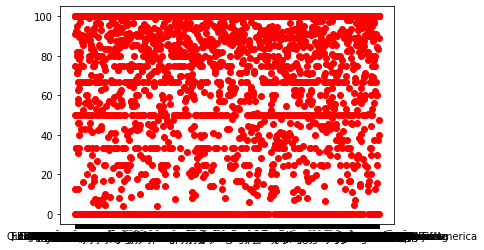

In [238]:
influencer = allInfluencerAdherences['influencer_name']
adherence_per = allInfluencerAdherences['adherence %']
plt.plot(influencer, adherence_per, 'ro')